<div style="display: flex; text-align:center; background-color: #038C3E ;border: 1px solid RGB(51,165,182); position: relative;"> 
    <h1 style="margin: auto;color:RGB(255,255,255); padding: 30px;margin-left: 2em; text-indent: -2em">
        PREDICTION DU NOMBRE DE PASSAGERS D'UNE COMPAGNIE AERIENNE
    </h1>
    <p style="position: absolute; bottom: 10px; right: 10px; margin: 0; color: RGB(255,255,255); font-size: 16px;">
        Yves N. Teki , Data Analyst
    </p>
    <p style="position: absolute; bottom: 10px; left: 10px; margin: 0; color: RGB(255,255,255); font-size: 12px;">
        01 decembre 2024
    </p>
</div>


<div style="border: 2px solid #D95407;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em ">0.0 - Introduction</h3>
</div>

À l'instar des entreprises de tous les secteurs d'activité, les compagnies aériennes font face à de nombreux défis.
Gérer les perturbations causées par des facteurs externes (météo, grèves) ou internes (réduction des pannes inattendues et optimisation des cycles de maintenance, comme avec la maintenance prédictive), respecter les normes environnementales et réduire les émissions de CO₂ tout en maintenant la compétitivité sont autant de problématiques majeures.</br>
Cependant, un défi majeur reste la prédiction de la demande de passagers. Cette tâche permet, par exemple, d'identifier les tendances de voyage et d'ajuster la capacité (vols, horaires, avions) pour répondre à la demande sans surplus ni déficit. Elle peut également permettre d'ajuster dynamiquement les prix des billets pour maximiser les revenus en fonction de la demande, de la concurrence et des saisons.</br>
Dans ce projet, nous tenterons de prédire la demande de passagers d'une compagnie aérienne à l'aide du modèle ARIMA (Auto Regressive Integrated Moving Average).</br>

<div style="border-style: double;border-width: 5px;border-color: #D95407;color: #731702" >
<h3 style="margin: auto; padding: 10px ;margin-left: 4.5em; text-indent: -4.5em"><a id="00">SOMMAIRE</a> </h3>
        
  - 1. **[PREPARATION DE DONNEES](#1)**
     - 1. [Qualité des données](#11)
     - 2. [Nettoyage des données](#12)
  
  - 2. **[ANALYSE EXPLORATOIRE DES DONNEES](#2)**
     - 1. [Visualisation des séries temporelles](#21)
     - 2. [Détection des tendances, saisonnalités et variations](#22)
    
  - 3. **[MODELISATION ARIMA - Methodologie de Box-Jenkins](#3)**
     - 1. [Identification du modèle](#31)
     - 2. [Estimation du modèle](#32)
     - 3. [Vérification du modèle](#33)
     - 4. [Prédiction](#33)
    
</div>


<div style="border: 2px solid #D95407;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em ">0.1 - Importation des librairies et declaration de fonctions</h3>
</div>

In [1]:
#!pip show scipy statsmodels
#!pip install scipy==1.7.3 --user
#!pip install --upgrade scipy numpy
#!pip install pmdarima --user

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
# Requirements

import matplotlib
import scipy
import statsmodels

# Récupérer les versions des bibliothèques
versions = [
    f"pandas=={pd.__version__}",
    f"numpy=={np.__version__}",
    f"seaborn=={sns.__version__}",
    f"matplotlib=={matplotlib.__version__}",
    f"statsmodels=={statsmodels.__version__}",
    f"scipy=={scipy.__version__}"
]

# Écrire dans un fichier .txt
with open("requirements.txt", "w") as file:
    file.write("\n".join(versions))

print("Les versions ont été écrites dans 'requirements.txt'.")

# Lire et afficher le contenu du fichier
with open("requirements.txt", "r") as file:
    content = file.read()

print("Contenu du fichier requirements.txt :")
print(content)

Les versions ont été écrites dans 'requirements.txt'.
Contenu du fichier requirements.txt :
pandas==2.2.3
numpy==1.22.4
seaborn==0.11.2
matplotlib==3.4.3
statsmodels==0.14.4
scipy==1.13.1


In [4]:
#pip install missingno

<div style="background-color: #038C3E ;" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">1 - PREPARATION DE DONNEES</h2>
</div>

<div style="border: 1px solid #D95407 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="11">1 - 1. Qualité des données</a></h3>
</div>

In [5]:
data = pd.read_csv("./data/input/AirPassengers.csv",decimal=",",sep=',')
data.rename(columns={'#Passengers':'Passengers'},inplace=True)
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


La base de données AirPassengers est une série temporelle classique qui représente le nombre mensuel de passagers aériens internationaux.</br>
Elle est souvent utilisée comme exemple pour illustrer les modèles de prévision.

La base de données AirPassengers contient les colonnes suivantes :

1 **Month** : La date (mois et année) de chaque observation.</br>
2 **Passengers** : Le nombre de passagers aériens internationaux pour chaque mois.


Les données de la base AirPassengers couvrent la période de janvier 1949 à décembre 1960, soit 12 années de données mensuelles.

Vous pouvez télécharger la base de données AirPassengers en utilisant le lien suivant :

[**AirPassengers.csv**](https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
# Conversion de la date en datetime
from datetime import datetime
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)
# Mettre la date en index de la table
data.set_index('Month',inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
data.isnull().sum()

Passengers    0
dtype: int64

Nous pouvons constater que nous avons aucunes valeurs manquantes dans le jeux de données .

In [9]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
# Calculer les outliers

Q1 = data["Passengers"].quantile(0.25)  # Premier quartile
Q3 = data["Passengers"].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1                  # Intervalle interquartile

lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure

# Identifier les outliers
outliers = data[(data["Passengers"] < lower_bound) | data["Passengers"] > upper_bound]

print(f"Colonne: Passengers")
print(f"Nombre d'outliers: {len(outliers)}")
#   print(f"Indices des outliers: {outliers.index.tolist()}\n")


Colonne: Passengers
Nombre d'outliers: 0


<div style="border: 1px solid #D95407 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="12">1 - 2. Nettoyage des données - </a></h3>
</div>

<div style="background-color: #038C3E ;" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">2 - ANALYSES EXPLORATOIRES</h2>
</div>

<div style="border: 1px solid #D95407 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="21">2 - 1. Visualisation des séries temporelles</a></h3>
</div>




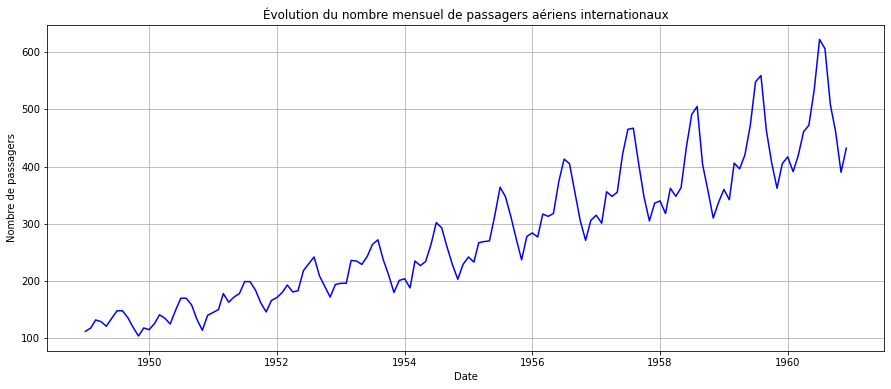

In [11]:
# Créer le graphique
fig = plt.figure(figsize=(15, 6))
plt.plot(data, color='blue')
plt.title('Évolution du nombre mensuel de passagers aériens internationaux')
plt.xlabel('Date')
plt.ylabel('Nombre de passagers')
plt.grid(True)
plt.show()
fig.savefig("./Data/output/EvolutionMensuelle.png",dpi=300)
plt.close(fig)

Nous pouvons déjà soupçonner une tendance croissante de la serie , avec une saisonnalité bien marquée.
En outre on peut soupçonner que la serie n'est pas stationnaire vu l'accroissement de la moyenne au cours du temps. On pourra vérifier ces hypothèses plus loin. 

<div style="border: 1px solid #D95407 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="22">2 - 2. Détection des tendances, saisonnalités et variations</a></h3>
</div>

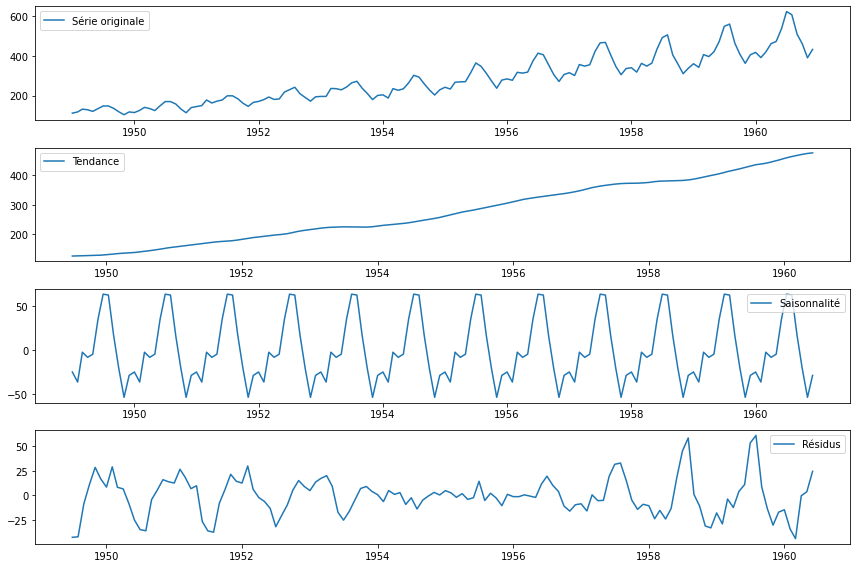

In [12]:
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(data['Passengers'], model='additive')

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['Passengers'], label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

<div style="background-color: #038C3E ;" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">3 - MODELISATION ARIMA - Methodologie de Box-Jenkins</h2>
</div>

<div style="border: 1px solid #D95407 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="21">3 - 1. Identification du modèle</a></h3>
</div>

### ACF et PACF

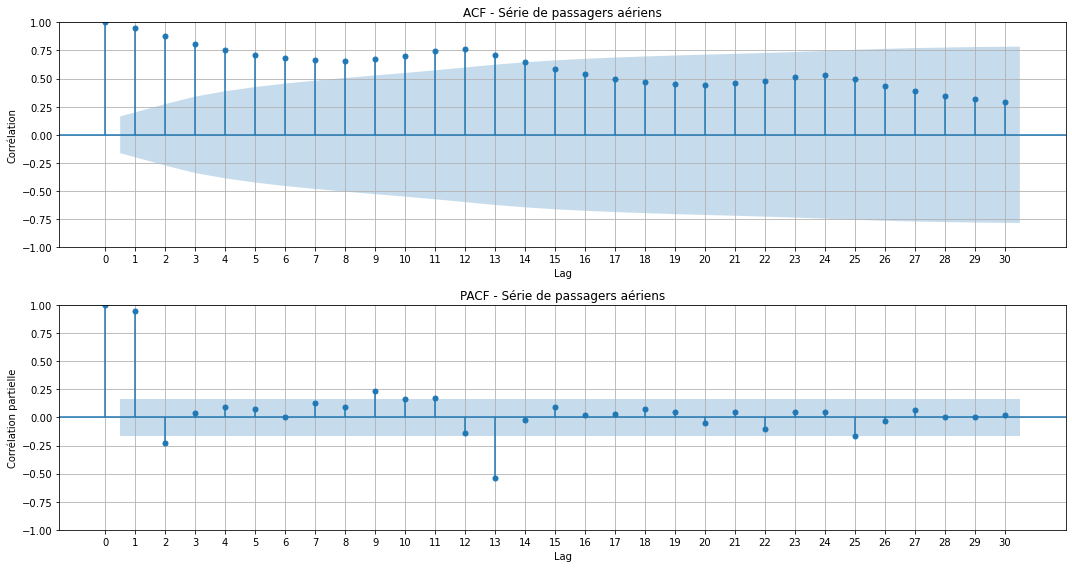

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

# Tracer l'ACF
plot_acf(data['Passengers'], lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de passagers aériens')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(data['Passengers'], lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de passagers aériens')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()
fig.savefig("./Data/output/ACF_PACF.png",dpi=300)
plt.close(fig)

In [14]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(data)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | 0.8153688792060482            |
| P-valeur       | 0.991880243437641             |
| Conclusion     | La série est non stationnaire |


#### Différentciation (Stationnarisation)

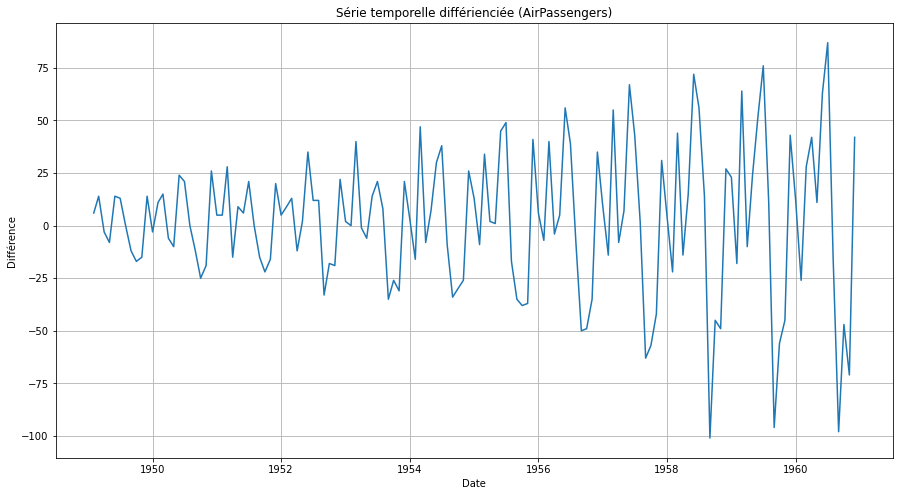

In [15]:

# Différenciation pour rendre la série stationnaire
differenced = data['Passengers'].diff().dropna()

# Afficher la série différienciée
fig = plt.figure(figsize=(15, 8))
plt.plot(differenced)
plt.title('Série temporelle différienciée (AirPassengers)')
plt.xlabel('Date')
plt.ylabel('Différence')
plt.grid(True)
plt.show()
fig.savefig("./Data/output/SerieDifferenciee.png",dpi=300)
plt.close(fig)

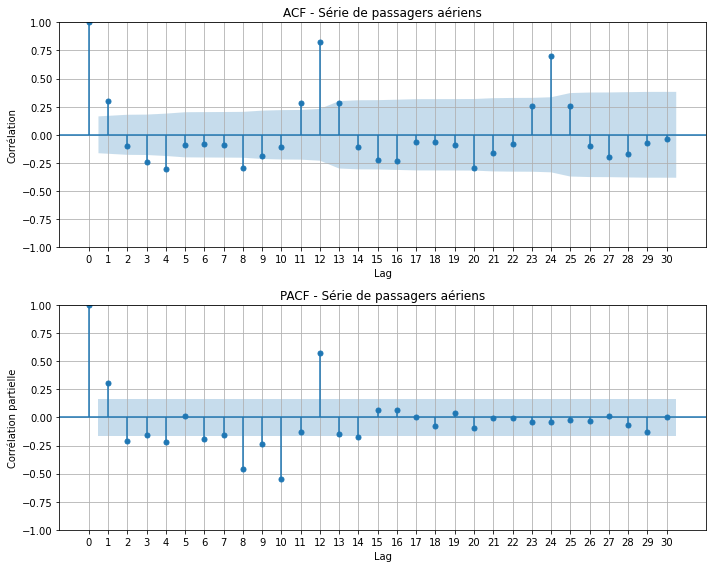

In [16]:
##Verification de la stationnarité avec L'ACF et le PACF

# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de passagers aériens')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de passagers aériens')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()
fig.savefig("./Data/output/ACF_PACF_diff1.png",dpi=300)
plt.close(fig)

In [17]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(differenced)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | -2.8292668241699994           |
| P-valeur       | 0.0542132902838255            |
| Conclusion     | La série est non stationnaire |


Nous constatons que la serie n'est toujours pas stationnaire . Nous allons la differencier une 2e fois .

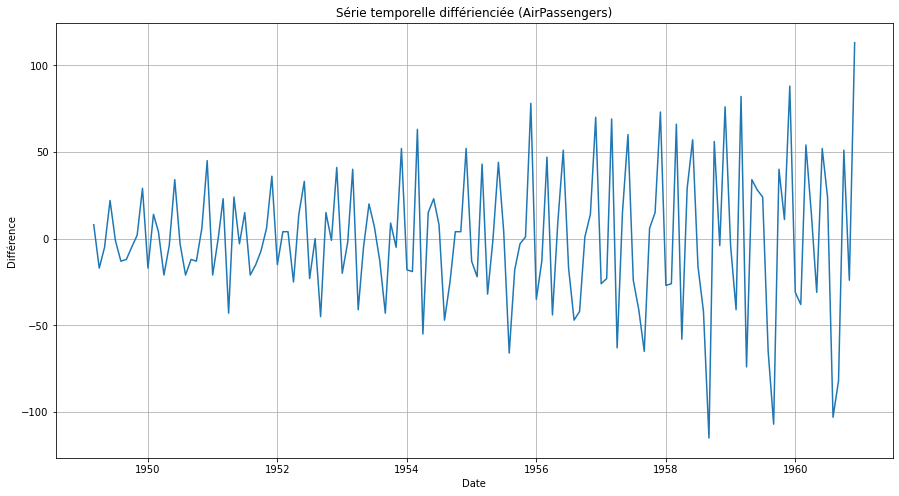

In [18]:

# Différenciation d'ordre 2 pour rendre la série stationnaire
differenced2 = differenced.diff().dropna()

# Afficher la série différienciée
fig = plt.figure(figsize=(15, 8))
plt.plot(differenced2)
plt.title('Série temporelle différienciée (AirPassengers)')
plt.xlabel('Date')
plt.ylabel('Différence')
plt.grid(True)
plt.show()
fig.savefig("./Data/output/SerieDifferenciee2.png",dpi=300)
plt.close(fig)

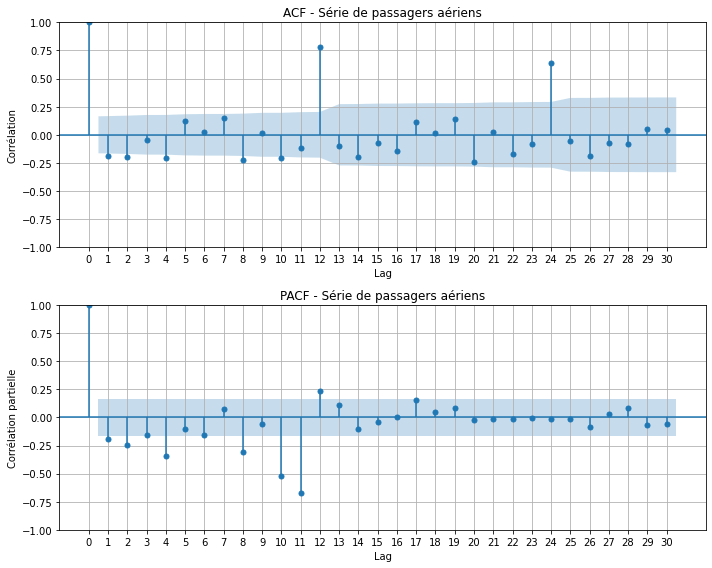

In [19]:
##Verification de la stationnarité avec L'ACF et le PACF

# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced2, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de passagers aériens')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced2, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de passagers aériens')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()
fig.savefig("./Data/output/ACF_PACF_diff2.png",dpi=300)
plt.close(fig)

In [20]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(differenced2)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -16.384231542468505       |
| P-valeur       | 2.7328918500142407e-29    |
| Conclusion     | La série est stationnaire |


Nous pouvons constater que la serie est stationnaire à l'ordre 2 .

#### Ordre p,d,q

p=2,
d=1,
q=1

<div style="border: 1px solid #D95407 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="21">3 - 2. Estimation du modèle</a></h3>
</div>

In [21]:
# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = data['Passengers'][:-15]
test_data = data['Passengers'][-15:]

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Créer un modèle ARIMA(2,1,1)
model = ARIMA(train_data, order=(2,1,1))

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -604.753
Date:                Thu, 19 Dec 2024   AIC                           1217.507
Time:                        18:17:18   BIC                           1228.915
Sample:                    01-01-1949   HQIC                          1222.142
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0810      0.105     10.263      0.000       0.875       1.287
ar.L2         -0.4722      0.102     -4.641      0.000      -0.672      -0.273
ma.L1         -0.8445      0.094     -8.981      0.0

C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<div style="border: 1px solid #D95407 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="21">3 - 3. Vérification du modèle</a></h3>
</div>

#### Absence d'autocorrelation des residus - Test de Ljung-Box


<Figure size 936x360 with 0 Axes>

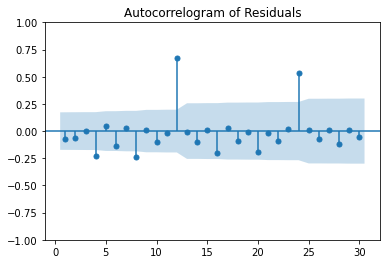

<Figure size 936x360 with 0 Axes>

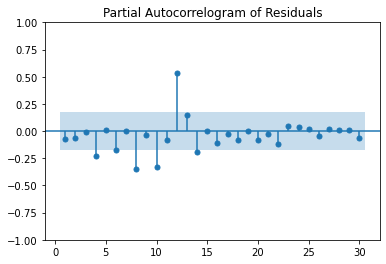

In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les résidus
residuals = model_fit.resid

# Tracer l'ACF des résidus
fig=plt.figure(figsize=(13, 5))
plot_acf(residuals, lags=30, zero=False)
plt.title("Autocorrelogram of Residuals")
plt.show()
fig.savefig("Data/output/autocorrelogramResidus.png",dpi=300)
plt.close(fig)

# Tracer la PACF des résidus
fig=plt.figure(figsize=(13, 5))
plot_pacf(residuals, lags=30, zero=False)
plt.title("Partial Autocorrelogram of Residuals")
plt.show()
fig.savefig("Data/output/partialAutocorrelogramResidus.png",dpi=300)
plt.close(fig)

## Prédiction

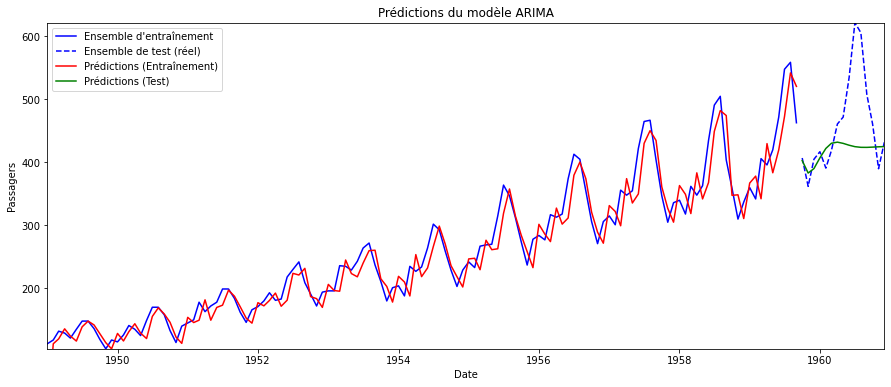

In [24]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(15, 6))
plt.plot(train_data, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(train_predictions ,label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))

plt.xlabel('Date')
plt.ylabel('Passagers')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()
fig.savefig("./Data/output/PredictionModelImparfait.png",dpi=300)
plt.close(fig)

In [25]:
# Mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_predictions)
train_mse = mean_squared_error(train_data, train_predictions)
train_rmse = mean_squared_error(train_data, train_predictions, squared=False)
train_r2 = r2_score(train_data, train_predictions)

# Mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, test_predictions)
test_mse = mean_squared_error(test_data, test_predictions)
test_rmse = mean_squared_error(test_data, test_predictions, squared=False)
test_r2 = r2_score(test_data, test_predictions)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)

  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                22.183944         54.144213
1      MSE               830.835014       6510.318940
2     RMSE                28.824209         80.686547
3       R²                 0.925421         -0.148361


Cet model ne semble pas être correct .
Nous allons proceder à un ajustement par selection automatique des ordres p,d,q

# Modèle automatique

In [26]:
import pmdarima as pm
print(pm.__version__)


2.0.4


In [27]:

import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = data['Passengers'][:-15]
test_data = data['Passengers'][-15:]

# Recherche des meilleurs paramètres ARIMA avec auto_arima
model = pm.auto_arima(
    train_data         # Limiter le nombre total de tentatives
)

# Afficher le résumé du meilleur modèle
print("\nMeilleur modèle ARIMA trouvé :")
print(model.summary())



Meilleur modèle ARIMA trouvé :
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -589.217
Date:                Thu, 19 Dec 2024   AIC                           1190.435
Time:                        18:17:23   BIC                           1207.547
Sample:                    01-01-1949   HQIC                          1197.388
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6605      0.126      5.239      0.000       0.413       0.908
ar.L1          1.6235      0.041     39.770      0.000       1.543       1.703
ar.L2         -0.895

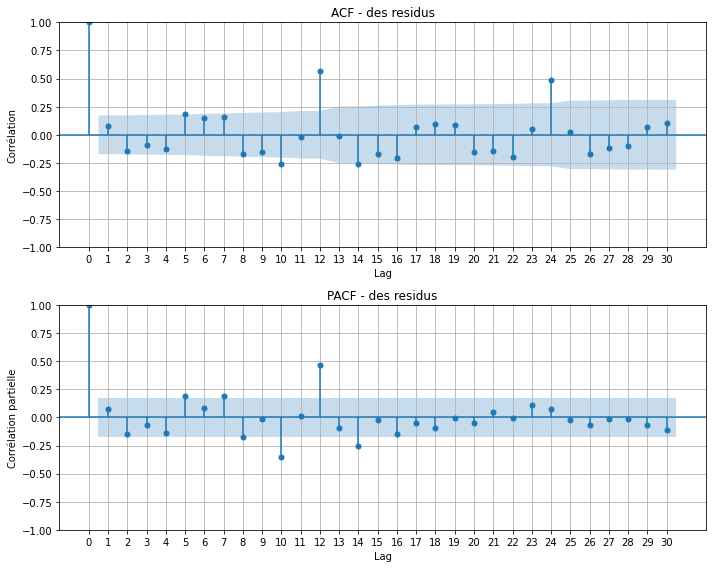

In [28]:
##Verification de la stationnarité des residus avec L'ACF et le PACF 

# Ajuster le modèle aux données
model.fit(train_data)
# Obtenir les résidus du modèle
residuals = model.resid()

# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(residuals, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - des residus')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(residuals, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - des residus')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()
fig.savefig("./Data/output/ACF_PACF_residus.png",dpi=300)
plt.close(fig)

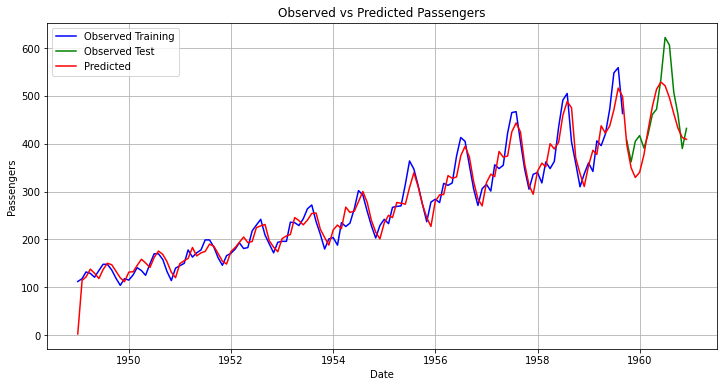

In [29]:

# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Calculer les mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_pred)
train_mse = mean_squared_error(train_data, train_pred)
train_rmse = mean_squared_error(train_data, train_pred, squared=False)
train_r2 = r2_score(train_data, train_pred)

# Calculer les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, predicted)
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)
test_r2 = r2_score(test_data, predicted)

# Créer un DataFrame pour afficher les mesures de performance
performance_data = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_data)




  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                19.581816         39.310911
1      MSE               656.693866       2679.973876
2     RMSE                25.626039         51.768464
3       R²                 0.941052          0.527277


In [31]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan, normal_ad
residuals = model.resid()  # Par exemple, `model` est un modèle ARIMA ajusté

## Test de Ljung-Box

Le test de Ljung-Box teste l'absence d'autocorrélation dans les résidus. Nous voulons que les résidus soient indépendants les uns des autres. Une faible valeur p (p < 0,05) indique une preuve d'autocorrélation.

In [32]:


# Test de Ljung-Box
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Test de Ljung-Box :\n", ljung_box_results)

Test de Ljung-Box :
      lb_stat  lb_pvalue
10  34.99014   0.000125


## Hétéroscédasticité

L'hétéroscédasticité se réfère à la situation dans laquelle la variabilité de l'erreur de prédiction (ou résidu) n'est pas constante à travers toutes les observations. Nous préférons avoir une erreur de prédiction constante, donc la vérification de l'hétéroscédasticité est importante. Un bon modèle devrait présenter une homoscédasticité, c'est-à-dire une variance constante des résidus.

In [33]:
# Test d'hétéroscédasticité (Breusch-Pagan)
_, pval_bp, _, _ = het_breuschpagan(residuals, sm.add_constant(range(len(residuals))))
print(f"P-valeur pour le test de Breusch-Pagan : {pval_bp}")

P-valeur pour le test de Breusch-Pagan : 0.03990502349185714


Puisque la p-valeur est inférieure à 0,05 
la variance des résidus n'est pas constante. Les résidus sont hétéroscédastiques.

## Normalité

L'aspect de normalité fait référence à la distribution des résidus. Dans un bon modèle, nous attendons que les résidus suivent une distribution normale. Pour vérifier cela, nous pouvons utiliser un graphique Q-Q ou effectuer un test statistique, comme le test de Shapiro-Wilk, pour vérifier la normalité.

In [34]:

# Test de normalité (Anderson-Darling)
_, pval_norm = normal_ad(residuals)
print(f"P-valeur pour le test de normalité (Anderson-Darling) : {pval_norm}")


P-valeur pour le test de normalité (Anderson-Darling) : 0.005764230549536729


## Graphiques des résidus

En plus des tests statistiques, il est utile de tracer les résidus au fil du temps, ainsi que leur autocorrélation (ACF et PACF), pour vérifier visuellement les suppositions précédentes. Dans un modèle bien ajusté, les résidus devraient ressembler à un bruit blanc lorsqu'ils sont tracés dans le temps, et l'ACF et le PACF devraient montrer peu ou pas de corrélation significative.

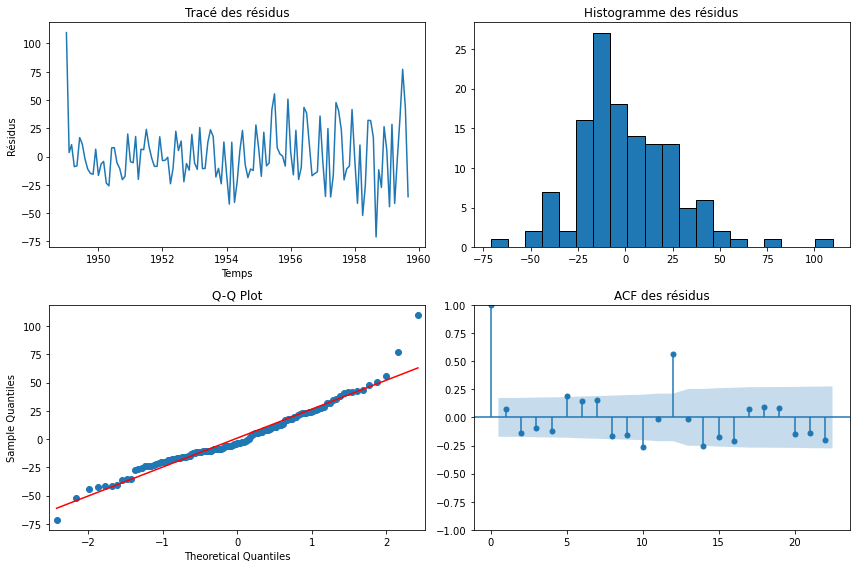

In [35]:
# Graphiques des résidus
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Tracé des résidus
axes[0, 0].plot(residuals)
axes[0, 0].set_title("Tracé des résidus")
axes[0, 0].set_xlabel("Temps")
axes[0, 0].set_ylabel("Résidus")

# Histogramme des résidus
axes[0, 1].hist(residuals, bins=20, edgecolor='black')
axes[0, 1].set_title("Histogramme des résidus")

# Q-Q plot
sm.qqplot(residuals, line='s', ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot")

# ACF des résidus
sm.graphics.tsa.plot_acf(residuals, ax=axes[1, 1])
axes[1, 1].set_title("ACF des résidus")

plt.tight_layout()
plt.show()

[RETOUR AU SOMMAIRE](#00)